In [1]:
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#----------------------------------------------------

In [2]:
#load iris data

IrisData = load_iris()

#X Data
X = IrisData.data

#y Data
y = IrisData.target

#----------------------------------------------------

In [3]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#----------------------------------------------------

In [4]:
#Applying MLPClassifier Model 

'''
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                     alpha=0.0001,batch_size='auto’, learning_rate=’constant’,momentum=0.9,
                                     learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                     random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                                     n_iter_no_change=10, nesterovs_momentum=True,early_stopping=False, 
                                     validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,)
'''

MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
print('----------------------------------------------------')

MLPClassifierModel Train Score is :  0.98
MLPClassifierModel Test Score is :  0.92
MLPClassifierModel loss is :  0.10888678646001199
MLPClassifierModel No. of iterations is :  200
MLPClassifierModel No. of layers is :  4
MLPClassifierModel last activation is :  softmax
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [5]:
#Calculating Prediction
y_pred = MLPClassifierModel.predict(X_test)
y_pred_prob = MLPClassifierModel.predict_proba(X_test)
print('Predicted Value for MLPClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob[:10])

#----------------------------------------------------

Predicted Value for MLPClassifierModel is :  [2 0 1 1 2 0 2 2 2 2]
Prediction Probabilities Value for MLPClassifierModel is :  [[2.28424458e-27 7.88679799e-02 9.21132020e-01]
 [1.00000000e+00 2.63442672e-23 6.97736009e-29]
 [1.60757093e-05 9.84322883e-01 1.56610417e-02]
 [1.82129213e-06 9.78972894e-01 2.10252844e-02]
 [2.26561481e-27 7.87955507e-02 9.21204449e-01]
 [1.00000000e+00 2.63433073e-23 6.97680046e-29]
 [2.26552709e-27 7.87939246e-02 9.21206075e-01]
 [2.26561083e-27 7.87954786e-02 9.21204521e-01]
 [2.26561647e-27 7.87954949e-02 9.21204505e-01]
 [8.52433327e-23 2.39171534e-01 7.60828466e-01]]


In [6]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[18  0  0]
 [ 2 11  2]
 [ 0  0 17]]


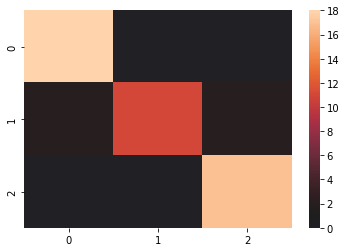

In [7]:
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()